# Project 2: Titanic (Classification)

## Problem Statment

If you are familiar with the Titanic movie, you may have wondered about the story of Jack who died and Rose who survived! But what about the others? Fortuanetly, we have a a data set of the people who were on the titatnic and we would like to make a model that can predict the survival of a passenger given some features! 

## Executive Summary

1\ Objective: Developing a model that can predict survival of passengers based on certain features.

2\ Datasets Description: 

https://www.kaggle.com/c/titanic/data

We have 2 main datasets. 
1- The main data set which has 891 entries(each representing a passenger) along with 12 features (columns) , starting with ID for each row/passenger. and ending with (Survived) which is an indicator (1 the passenger survived & 0 died). 'Survived' is our target feautre which is the base we want to develop a model to predict for test data. 
2- The testing data set which has 418 entries(each representing a passenger) along with 11 features (columns) , starting with ID for each row/passenger. There is no 'survived' since the goal of this set is to predict the target. 

3\ Data Importing & Cleaning & Features Engineering: We import the data, look at it, and find out that it has  some categorial and numerical values. We start looking at missing values (nulls), relation with target, and meaning of values. We came back to this section to do the feautres engineering after the initial modelling. 

4\ EDA & Data Visualization: We start plotting categorical and numerical features against the target to see the possible effect and basic insight for each feature. We then plot some features together to see the relation between these features. Then we fill nulls with median, mode or mean depending on what seems appropriate from our EDA. 

5\ Data Modeling:

We use a variety of differnt models keeping in mind some basic knowledge about models:

1- KNN with GridSearch
2- KNN with GridSearchCV
3- Bagging with GridSearchCV
4- DT with GridSearchCV
5- RFR with GridSearchCV


### import all required library

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import svm 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 200)

#### Read train and test data

In [2]:
train_df = pd.read_csv('dataset/train.csv')
test_df  = pd.read_csv('dataset/test.csv')

In [3]:
train_df.shape

(891, 12)

In [4]:
test_df.shape

(418, 11)

In [5]:
# Concat our dataframe in one dataframe to clean both train and test.
titanic_df = pd.concat([train_df, test_df], join='inner', ignore_index=True)

In [6]:
y = train_df.Survived

In [7]:
titanic_df.shape

(1309, 11)

In [8]:
titanic_df.head()


PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S

In [9]:
titanic_df.tail()

PassengerId  Pclass                          Name     Sex   Age  SibSp  \
1304         1305       3            Spector, Mr. Woolf    male   NaN      0   
1305         1306       1  Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306         1307       3  Saether, Mr. Simon Sivertsen    male  38.5      0   
1307         1308       3           Ware, Mr. Frederick    male   NaN      0   
1308         1309       3      Peter, Master. Michael J    male   NaN      1   

      Parch              Ticket      Fare Cabin Embarked  
1304      0           A.5. 3236    8.0500   NaN        S  
1305      0            PC 17758  108.9000  C105        C  
1306      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
1307      0              359309    8.0500   NaN        S  
1308      1                2668   22.3583   NaN        C

## Data Cleaning / Features Engineering 

In [10]:
titanic_df.isna().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [11]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# Check Embarked nulls
titanic_df[titanic_df.Embarked.isna()]

PassengerId  Pclass                                       Name     Sex  \
61            62       1                        Icard, Miss. Amelie  female   
829          830       1  Stone, Mrs. George Nelson (Martha Evelyn)  female   

      Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   38.0      0      0  113572  80.0   B28      NaN  
829  62.0      0      0  113572  80.0   B28      NaN

In [13]:

titanic_df[titanic_df.Name.str.contains('Miss.')].Embarked.value_counts()

S    155
Q     55
C     49
Name: Embarked, dtype: int64

In [14]:


titanic_df[titanic_df.Name.str.contains('Mrs.')].Embarked.value_counts()

S    135
C     61
Q      4
Name: Embarked, dtype: int64

In [15]:
# Fill nulls with majority "S"
titanic_df.Embarked.fillna('S', inplace=True)

In [16]:
# Check if the nulls still exist.
titanic_df[titanic_df.Embarked.isna()]

Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

In [17]:
titanic_df.Age[titanic_df.Name.str.contains('Mr.')].median()

30.0

In [18]:
# We'll fill null values in age column by the median of the ages of people with same title (Mr. Mrs etc..)

titanic_df.Age[titanic_df.Name.str.contains('Ms.')] = titanic_df.Age[titanic_df.Name.str.contains('Ms.')].fillna(titanic_df.Age[titanic_df.Name.str.contains('Ms.')].median())
titanic_df.Age[titanic_df.Name.str.contains('Dr.')] = titanic_df.Age[titanic_df.Name.str.contains('Dr.')].fillna(titanic_df.Age[titanic_df.Name.str.contains('Dr.')].median())
titanic_df.Age[titanic_df.Name.str.contains('Mr.')] = titanic_df.Age[titanic_df.Name.str.contains('Mr.')].fillna(titanic_df.Age[titanic_df.Name.str.contains('Mr.')].median())
titanic_df.Age[titanic_df.Name.str.contains('Mrs.')] = titanic_df.Age[titanic_df.Name.str.contains('Mrs.')].fillna(titanic_df.Age[titanic_df.Name.str.contains('Mrs.')].median())
titanic_df.Age[titanic_df.Name.str.contains('Master.')] = titanic_df.Age[titanic_df.Name.str.contains('Master.')].fillna(titanic_df.Age[titanic_df.Name.str.contains('Master.')].median())
titanic_df.Age[titanic_df.Name.str.contains('Miss.')] = titanic_df.Age[titanic_df.Name.str.contains('Miss.')].fillna(titanic_df.Age[titanic_df.Name.str.contains('Miss.')].median())


In [19]:
# to check the null belong to which class.
titanic_df[titanic_df.Fare.isna()]

PassengerId  Pclass                Name   Sex   Age  SibSp  Parch  \
1043         1044       3  Storey, Mr. Thomas  male  60.5      0      0   

     Ticket  Fare Cabin Embarked  
1043   3701   NaN   NaN        S

In [20]:
# Fill Fare nulls with the mean of the class
titanic_df.Fare.fillna(titanic_df.Fare[titanic_df.Pclass == 3].mean(), inplace=True)

In [21]:
titanic_df.isna().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [22]:
#The majority of cabin values are missing and since it represents the cabin# and the categories are too many, we decided to drop the column
titanic_df_ = titanic_df.drop(['PassengerId','Ticket', 'Cabin'], axis=1)



In [23]:
titanic_df_.isna().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [24]:
sex = {'male' : 1, 'female' : 0}


titanic_df_.Sex.map(sex)
titanic_df_.Sex = titanic_df_.Sex.apply(lambda x :  1 if x == 'male' else 0)

In [25]:
#Since these have similar correlation and similar meaning: 

titanic_df_['n_family'] = titanic_df_.SibSp + titanic_df_.Parch

In [26]:

titanic_df_.drop(['SibSp', 'Parch'], axis=1,  inplace=True)

In [27]:
titanic_df_

Pclass                                               Name  Sex   Age  \
0          3                            Braund, Mr. Owen Harris    1  22.0   
1          1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0   
2          3                             Heikkinen, Miss. Laina    0  26.0   
3          1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0   
4          3                           Allen, Mr. William Henry    1  35.0   
...      ...                                                ...  ...   ...   
1304       3                                 Spector, Mr. Woolf    1  30.0   
1305       1                       Oliva y Ocana, Dona. Fermina    0  39.0   
1306       3                       Saether, Mr. Simon Sivertsen    1  38.5   
1307       3                                Ware, Mr. Frederick    1  30.0   
1308       3                           Peter, Master. Michael J    1   4.0   

          Fare Embarked  n_family  
0       7.2500        S         1  
1      71.2833        C         1  
2       7.9250        S         0  
3      53.1000        S         1  
4       8.0500        S         0  
...        ...      ...       ...  
1304    8.0500        S         0  
1305  108.9000        C         0  
1306    7.2500        S         0  
1307    8.0500        S         0  
1308   22.3583        C         2  

[1309 rows x 7 columns]

In [28]:
titanic_df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null int64
Age         1309 non-null float64
Fare        1309 non-null float64
Embarked    1309 non-null object
n_family    1309 non-null int64
dtypes: float64(2), int64(3), object(2)
memory usage: 71.7+ KB


In [29]:
titanic_df_['Title'] = titanic_df_['Name'].str.extract(' ([A-Za-z]+)\.')

In [30]:
titanic_df_.Age = titanic_df_.Age.apply(lambda x :  int(x))

In [31]:
#Dividing and encoding Age 

titanic_df_.loc[ titanic_df_['Age'] <= 16, 'Age'] = 1,
titanic_df_.loc[(titanic_df_['Age'] > 16) & (titanic_df_['Age'] <= 26), 'Age'] = 2
titanic_df_.loc[(titanic_df_['Age'] > 26) & (titanic_df_['Age'] <= 36), 'Age'] = 3
titanic_df_.loc[(titanic_df_['Age'] > 36) & (titanic_df_['Age'] <= 62), 'Age'] = 4
titanic_df_.loc[ titanic_df_['Age'] > 62, 'Age'] = 5

In [32]:
titanic_df_.head()

Pclass                                               Name  Sex  Age  \
0       3                            Braund, Mr. Owen Harris    1    2   
1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0    4   
2       3                             Heikkinen, Miss. Laina    0    2   
3       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0    3   
4       3                           Allen, Mr. William Henry    1    3   

      Fare Embarked  n_family Title  
0   7.2500        S         1    Mr  
1  71.2833        C         1   Mrs  
2   7.9250        S         0  Miss  
3  53.1000        S         1   Mrs  
4   8.0500        S         0    Mr

In [33]:
titanic_df_.drop(['Name'], axis=1,  inplace=True)

In [34]:
# we will encode based on value counts
titanic_df_.Title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Ms            2
Major         2
Mlle          2
Dona          1
Mme           1
Lady          1
Countess      1
Sir           1
Capt          1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [35]:
# we make each encoded in a category except the values that have low frequency, we make them all in one category (5)
titledict = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 5, "Col": 5,"Mlle": 5, "Ms": 5,"Major": 5,"Mme": 5,"Jonkheer": 5,"Countess": 5,
                "Capt": 5, "Sir": 5, "Don": 5, "Dona" : 5, "Lady": 5}

titanic_df_['Title'] = titanic_df_['Title'].map(titledict)



In [36]:
titanic_df_.head()

Pclass  Sex  Age     Fare Embarked  n_family  Title
0       3    1    2   7.2500        S         1      1
1       1    0    4  71.2833        C         1      3
2       3    0    2   7.9250        S         0      2
3       1    0    3  53.1000        S         1      3
4       3    1    3   8.0500        S         0      1

In [37]:
#Categorizing and Encoding

titanic_df_.loc[ titanic_df_['Fare'] <= 17, 'Fare'] = 0
titanic_df_.loc[(titanic_df_['Fare'] > 17) & (titanic_df_['Fare'] <= 30), 'Fare'] = 1
titanic_df_.loc[(titanic_df_['Fare'] > 30) & (titanic_df_['Fare'] <= 100), 'Fare'] = 2
titanic_df_.loc[ titanic_df_['Fare'] > 100, 'Fare'] = 3

In [38]:
#float to int for Fare col
titanic_df_.Fare = titanic_df_.Fare.apply(lambda x :  int(x))

In [39]:
titanic_df_.head()

Pclass  Sex  Age  Fare Embarked  n_family  Title
0       3    1    2     0        S         1      1
1       1    0    4     2        C         1      3
2       3    0    2     0        S         0      2
3       1    0    3     2        S         1      3
4       3    1    3     0        S         0      1

In [40]:
#Encoding Embarked 
embarkmap = {"S": 0, "C": 1, "Q": 2}
titanic_df_['Embarked'] = titanic_df_['Embarked'].map(embarkmap)

In [41]:
#respliting the train and test. Calling train group xt here:
xt = titanic_df_.iloc[0:891,:]

In [42]:
xt['Survived'] = y

In [43]:
xt.head()

Pclass  Sex  Age  Fare  Embarked  n_family  Title  Survived
0       3    1    2     0         0         1      1         0
1       1    0    4     2         1         1      3         1
2       3    0    2     0         0         0      2         1
3       1    0    3     2         0         1      3         1
4       3    1    3     0         0         0      1         0

## EDA and Visulization

In [44]:
# We create a function to visualize each feature based on survived or not
def catchart(col):
    dead = xt[xt['Survived']==0][col].value_counts()
    survived = xt[xt['Survived']==1][col].value_counts()
    df = pd.DataFrame([dead,survived])
    df.index = ['dead','survived']
    df.plot(kind = 'bar', title = col)

(None, None, None, None)

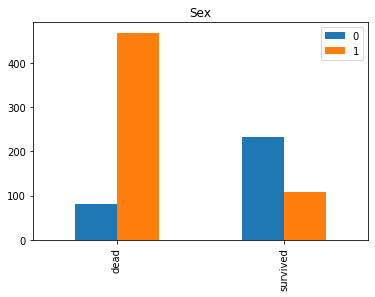

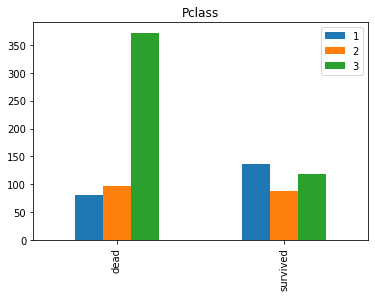

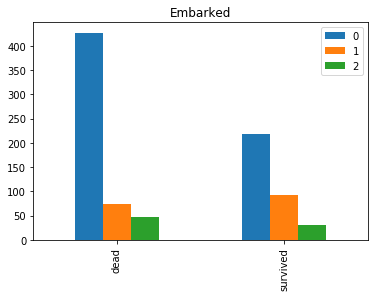

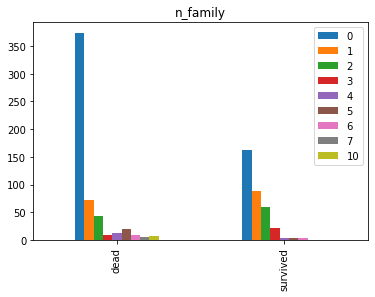

In [45]:
catchart('Sex'),catchart('Pclass'),catchart('Embarked'),catchart('n_family')

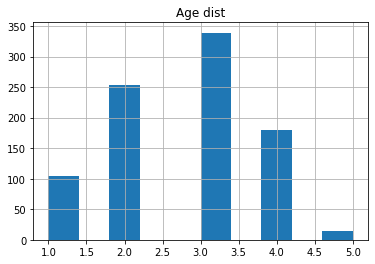

In [46]:
xt.hist(column = 'Age')
plt.title('Age dist');

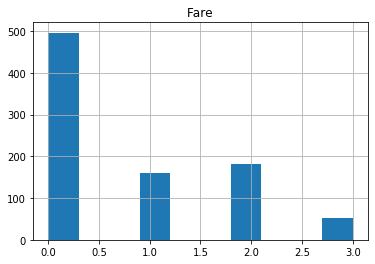

In [47]:
xt.hist(column = 'Fare');

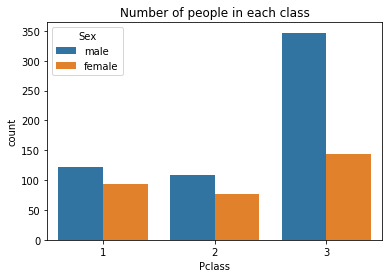

In [48]:
sns.countplot('Pclass', hue='Sex', data=train_df)
plt.title('Number of people in each class');

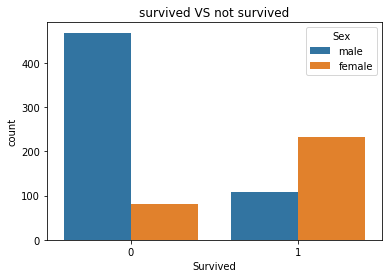

In [49]:
sns.countplot('Survived', hue='Sex', data=train_df)
plt.title('survived VS not survived');

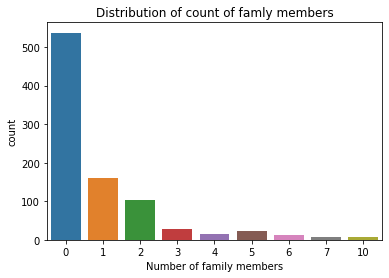

In [50]:
sns.countplot(xt.n_family)
plt.title('Distribution of count of famly members');
plt.xlabel("Number of family members");

In [51]:
X = xt
X.shape

(891, 8)

In [52]:
test_x = titanic_df_.iloc[891:,:]
test_x.shape 

(418, 7)

In [53]:
test_x.head()

Pclass  Sex  Age  Fare  Embarked  n_family  Title
891       3    1    3     0         2         0      1
892       3    0    4     0         0         1      3
893       2    1    4     0         2         0      1
894       3    1    3     0         0         0      1
895       3    0    2     0         0         2      3

In [54]:
X.describe()

Pclass         Sex         Age        Fare    Embarked    n_family  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     2.308642    0.647587    2.716049    0.765432    0.361392    0.904602   
std      0.836071    0.477990    0.969861    0.971490    0.635673    1.613459   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    2.000000    0.000000    0.000000    0.000000   
50%      3.000000    1.000000    3.000000    0.000000    0.000000    0.000000   
75%      3.000000    1.000000    3.000000    2.000000    1.000000    1.000000   
max      3.000000    1.000000    5.000000    3.000000    2.000000   10.000000   

            Title    Survived  
count  891.000000  891.000000  
mean     1.740741    0.383838  
std      1.052077    0.486592  
min      1.000000    0.000000  
25%      1.000000    0.000000  
50%      1.000000    0.000000  
75%      2.000000    1.000000  
max      5.000000    1.000000

In [55]:
X.n_family.value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: n_family, dtype: int64

In [56]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(25,10))

    # Generate a mask for the upper triangle (taken from the Seaborn example gallery):
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with Seaborn.
    # Assign the matplotlib axis the function returns. This allow us to resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True, vmin=-1, vmax=1)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    ax.title.set_text('Features Correlation')
    b,t=plt.ylim()
    b  +=.5
    t -=.5
    plt.ylim(b,t)


    plt.show()

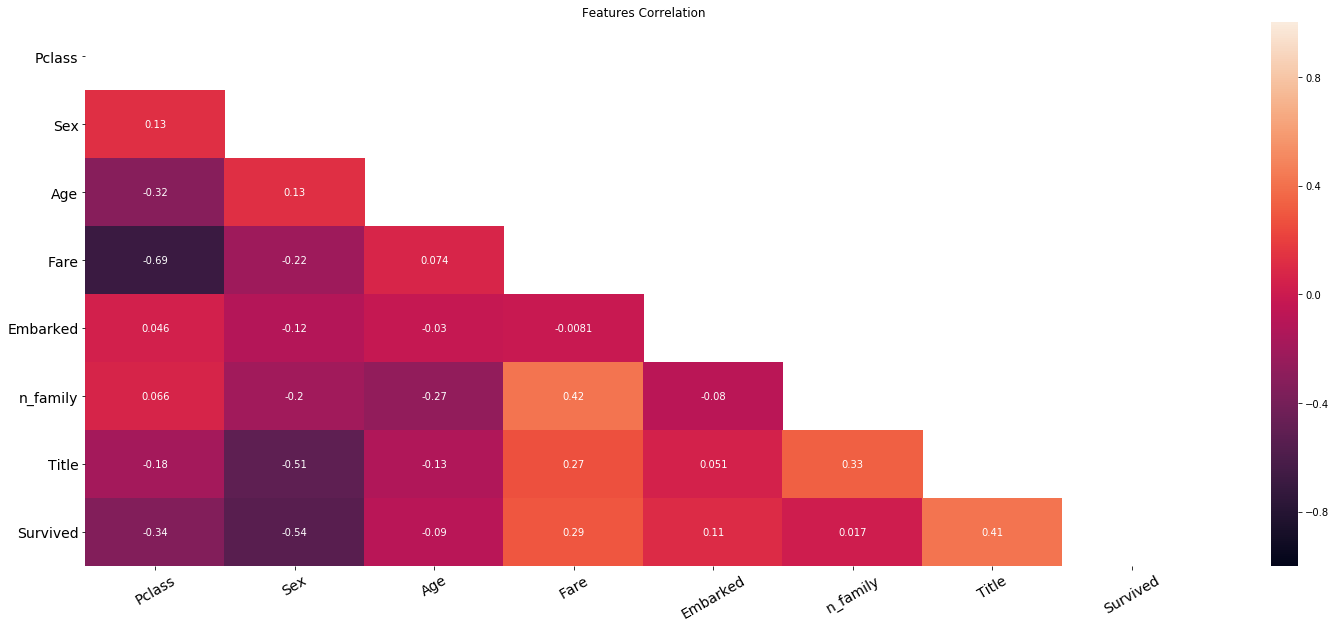

In [57]:
#Check Correlation after features engineering
correlation_heat_map(X)

## Modeling

In [58]:
X.drop('Survived', axis=1, inplace=True)

In [59]:
knn = KNeighborsClassifier()
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [60]:
knn.score(X,y)

0.8462401795735129

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=17, shuffle=True, stratify=y)

In [62]:
np.mean(cross_val_score(knn, X_train, y_train, cv=4))

0.8066252130547313

In [63]:
# ss = StandardScaler()

# X_train_s = ss.fit_transform(X_train)
# X_test_s = ss.transform(X_test)

# Not needed after features engineering

In [64]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [65]:
knn.score(X_train, y_train)

0.8455377574370709

In [66]:
k = np.arange(1, 60, 1)
grd1 = GridSearchCV(knn, {'n_neighbors': k}, n_jobs=-1)
grd1.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [67]:
grd1.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [68]:
grd1.best_params_

{'n_neighbors': 9}

In [69]:
grd1.best_score_

0.8249427917620137

In [131]:
submission1 = pd.DataFrame()
lst = []
for i in range(892, 1310):
    lst.append(i)
    

In [132]:
submission1['PassengerId'] = lst
submission1['Survived'] = grd1.predict(test_x)

In [133]:
submission1.set_index('PassengerId', inplace=True)


In [134]:
submission1.head()

Survived
PassengerId          
892                 0
893                 1
894                 0
895                 0
896                 1

In [135]:
submission1.to_csv('dataset/Submission1.csv')

In [127]:
# pram = {'penalty' : ['l1', 'l2', 'elasticnet']}


lr = LogisticRegression()
grd2 = GridSearchCV(lr, {'penalty' : ['l1', 'l2'], 'C' : [0.005, 0.05, 0.5, 1, 2, 5, 7]}, n_jobs=-1 )

grd2.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.005, 0.05, 0.5, 1, 2, 5, 7],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [128]:
grd2.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [129]:
grd2.best_score_

0.8157894736842105

In [130]:
grd2.best_params_

{'C': 1, 'penalty': 'l2'}

In [122]:
grd2.predict(test_x)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [123]:
submission2 = pd.DataFrame()
lst = []
for i in range(892, 1310):
    lst.append(i)
    

In [124]:
submission2['PassengerId'] = lst
submission2['Survived'] = grd2.predict(test_x)

In [125]:
submission2.set_index('PassengerId', inplace=True)


In [126]:
submission2.to_csv('dataset/submission2.csv')

In [84]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('train score',lr.score(X_train, y_train))
lr.score(X_test, y_test)

train score 0.8135011441647597


0.5882352941176471

In [85]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [86]:
print('Train score',dt.score(X_train, y_train))
dt.score(X_test, y_test)

Train score 0.8867276887871853


0.7058823529411765

In [87]:
para = {'max_depth' :np.arange(1, 10, 1), 
        'min_samples_leaf': np.arange(1, 5, 1),
        'min_weight_fraction_leaf' : np.arange(0.0, 0.5, 0.1),
        'max_features' : np.arange(0.005, 1, 0.05)}

grd3 = GridSearchCV(dt, para, n_jobs=-1)
grd3.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='wa...
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': array([0.005, 0.055, 0.105, 0.

In [88]:
grd3.best_score_

0.8386727688787186

In [89]:
grd3.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=0.455, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [90]:
grd3.best_params_

{'max_depth': 4,
 'max_features': 0.455,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0}

In [91]:
submission3 = pd.DataFrame()
lst = []
for i in range(892, 1310):
    lst.append(i)
    

In [92]:
submission3['PassengerId'] = lst
submission3['Survived'] = grd3.predict(test_x)

In [93]:
submission3.set_index('PassengerId', inplace=True)


In [94]:
submission3.to_csv('dataset/Submission3.csv')

In [95]:
para = {'n_estimators' :np.arange(1, 30, 1), 
        'max_depth': np.arange(1, 15, 1)}

rfr = RandomForestClassifier()

grd4 = GridSearchCV(rfr, para, n_jobs=-1)
grd4.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [96]:
grd4.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [97]:
grd4.best_params_

{'max_depth': 4, 'n_estimators': 5}

In [98]:
grd4.best_score_

0.8443935926773455

In [99]:
grd4.predict(test_x)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [100]:
submission4 = pd.DataFrame()
lst = []
for i in range(892, 1310):
    lst.append(i)
    

In [101]:
submission4['PassengerId'] = lst
submission4['Survived'] = grd4.predict(test_x)

In [102]:
submission4.set_index('PassengerId', inplace=True)


In [103]:
submission4.to_csv('dataset/Submission4.csv')

In [104]:

dt_b = BaggingClassifier( n_estimators=20,oob_score=True)

dt_b.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=20,
                  n_jobs=None, oob_score=True, random_state=None, verbose=0,
                  warm_start=False)

In [105]:
print('train', dt_b.score(X_train, y_train))
dt_b.score(X_test, y_test)

train 0.88558352402746


0.7647058823529411

In [106]:
para = {'n_estimators' :np.arange(1, 30, 1)}


dt1_b = BaggingClassifier(oob_score=True)

grd5 = GridSearchCV(dt1_b, para, n_jobs=-1)
grd5.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=True, random_state=None,
                                         verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [107]:
grd5.best_score_

0.8237986270022883

In [108]:
grd5.best_params_

{'n_estimators': 7}

In [109]:
grd5.best_estimator_
grd5.predict(test_x)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [110]:
submission5 = pd.DataFrame()
lst = []
for i in range(892, 1310):
    lst.append(i)
    

In [111]:
submission5['PassengerId'] = lst
submission5['Survived'] = grd5.predict(test_x)

In [112]:
submission5.set_index('PassengerId', inplace=True)


In [113]:
submission5.to_csv('dataset/Submission5.csv')

## Conclusion

We developed 5 classifications models to predict survival rates based on the data set of the titanic passengers.

We have 2 main datasets. 
1- The main data set which has 891 entries(each representing a passenger) along with 12 features (columns) , 'Survived' is our target feautre which can be 1 or 0. (Survived or not) 
2- The testing data set which has 418 entries(each representing a passenger) along with 11 features (columns).

We imported the data, looked at it, and found out that it has some categorial and numerical values. We start looking at missing values (nulls), relation with target, and meaning of values. 

Then we start EDA & Data Visualization: We start plotting categorical and numerical features against the target to see the possible effect and basic insight for each feature. 

5\ Data Modeling:

We use a variety of differnt models keeping in mind some basic knowledge about models:

1- KNN with GridSearch
2- KNN with GridSearchCV
3- Bagging with GridSearchCV
4- DT with GridSearchCV
5- RFR with GridSearchCV

And finally, we went back to the data cleaning step to do features engineering, where we changed some columns and created new ones, and went back to the modelling step again. 

Insights: 

1- Mose of those who died are males from the economy class. Those men probably tried to help their family members if they had or other females and children if not. 